In [1]:
#IMPORTING:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#IMPORTS OF RANDOM FOREST ALG
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
#SVM ALG
from sklearn import svm
from sklearn.metrics import classification_report

DISPLAYING THE DATASET

In [2]:
#READING THE DATASET
dp=pd.read_csv("C:\project\Raisin_Dataset.csv")
print(dp)

      Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter    Class  
0    0.758651   1184.040  Kecimen  
1    0.684130   1121.786  Kecimen  
2  

UNDERSTANDING THE DATASET

In [3]:
#CHECKING FIRST 5 DATAS
print(dp.head())

    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  


In [4]:
#CHECKING LAST 5 DATAS
print(dp.tail())

      Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter  Class  
895  0.668793   1129.072  Besni  
896  0.636476   1214.252  Besni  
897  0.741099   1292.828  Besni  
898  0.658798   1258.548  Besni  
899  0.632020   1272.862  Besni  


In [5]:
#DISPLAY THE TOTAL NUMBER OF ROWS AND COLUMN
dp.shape

(900, 8)

In [6]:
#TO RETURN THE DESCRIPTION OF DATA SET
dp.describe().round(2)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.00,900.00,900.00,900.00,900.00,900.00,900.00
mean,87804.13,430.93,254.49,0.78,91186.09,0.70,1165.91
std,39002.11,116.04,49.99,0.09,40769.29,0.05,273.76
min,25387.00,225.63,143.71,0.35,26139.00,0.38,619.07
25%,59348.00,345.44,219.11,0.74,61513.25,0.67,966.41
50%,78902.00,407.80,247.85,0.80,81651.00,0.71,1119.51
75%,105028.25,494.19,279.89,0.84,108375.75,0.73,1308.39
max,235047.00,997.29,492.28,0.96,278217.00,0.84,2697.75


In [7]:
#DISPLAY THE CONTENT OF COLUMN
dp.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [8]:
#PROVIDING ALTER NAME FOR CLASS
dp['Class'] = dp['Class'].str.replace('Kecimen', '0')
dp['Class'] = dp['Class'].str.replace('Besni', '1')
print(dp)

      Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter Class  
0    0.758651   1184.040     0  
1    0.684130   1121.786     0  
2    0.63761

In [9]:
#RETURN THE UNIQUE VALUE 
dp.nunique()

Area               900
MajorAxisLength    900
MinorAxisLength    900
Eccentricity       900
ConvexArea         896
Extent             900
Perimeter          900
Class                2
dtype: int64

In [10]:
#DISPLAY PARTICULAR UNIQUE COLUMN
dp['Class'].unique()

array(['0', '1'], dtype=object)

In [11]:
#CLEANING THE DATA SET CAN BE DONE WITH DROP
#CHECK FOR NULL
dp.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [12]:
#CHECKING FOR WRONG ENTRIES
for col in dp.columns:
    print('{} : {}'.format(col,dp[col].unique()))

Area : [ 87524  75166  90856  45928  79408  49242  42492  60952  42256  64380
  80437  43725  43441  76792  74167  33565  64670  64762  43295  70699
  69726  57346  82028  61251  96277  75620  73167  60847  81021  59902
  88745  41809  75329  61600  46427  40861  55827  54182  77468  49882
  95245  71464  77055  92384  77310  57580  69708  41502  45800  52623
  44939 114648  65727  45683 111450  47581  57127  53006  69060  25387
  66774  47839  78571  64717  60462  59370  54056  89235  51727  71595
  95347  60449  69006  68520  52731  50570  75825  42637  76984  47851
  51220  53890  58650  98935  77587 180898  71266  39457  35237  49059
  53896  56469  85156  67044  52243  38968  79661  59282  48177  74904
  81581  57820  57808  55306  59459  44247  48945  68864  82826  65396
  81572  44367  51448  50545  94063  84129  79735  90176  61492  79532
  69302  52266  51180  55787  96064  54316  70941  55770  47478  88197
  74728  70788  48894  52051  53270  57227  97026  58495  53758 110616

In [13]:
#MATHEMATICAL WAY TO COUNT THE VALUES
print(dp.Area.count())
print(dp.Area.max())
print(dp.Area.min())
print(dp.Area.quantile(.25))
print(dp.Area.quantile(.50))
print(dp.Area.quantile(.75))
print(dp.Area.mean())
print(dp.Area.median())
print(dp.Area.mode())

900
235047
25387
59348.0
78902.0
105028.25
87804.12777777777
78902.0
0       25387
1       26908
2       28216
3       31237
4       31275
        ...  
895    218459
896    222915
897    223075
898    225043
899    235047
Name: Area, Length: 900, dtype: int64


In [14]:
#DETERMINE THE STANDARD DEVIATION OF AREA
dp.Area.std()

39002.11139007148

DETECTING AND REMOVING THE OUTLIERS 

<Axes: >

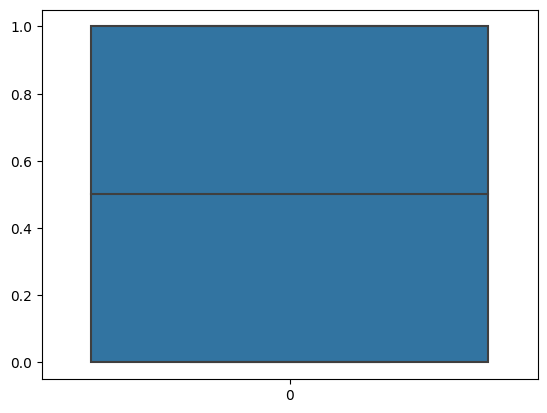

In [15]:
sns.boxplot(dp['Class'])

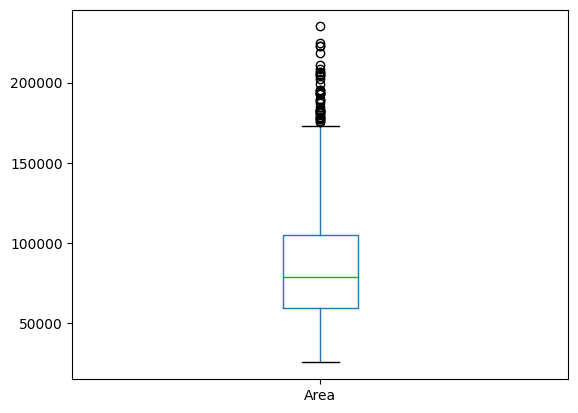

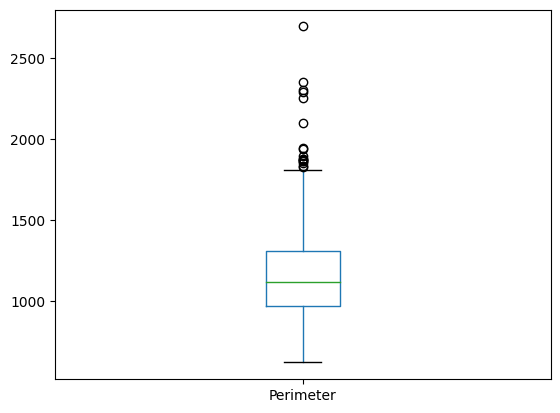

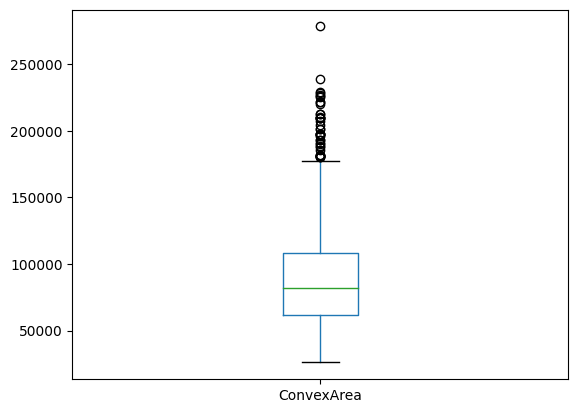

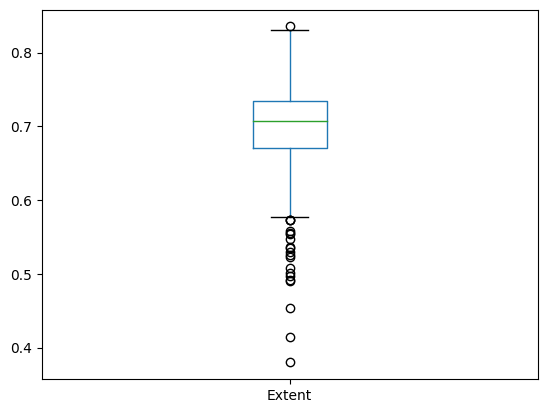

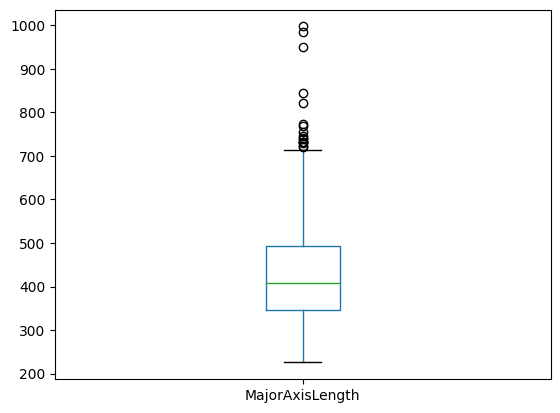

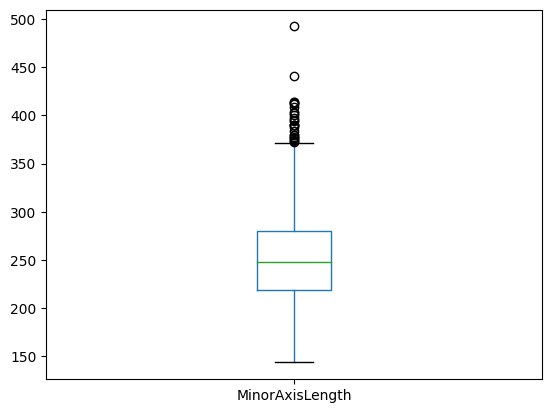

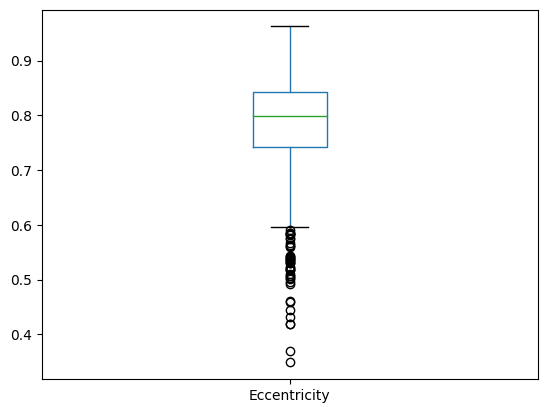

In [16]:
#DEFINE A FUNCTION CALLED BOX_PLOT
def plot_box(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_box(dp,'Area')
plot_box(dp,'Perimeter')
plot_box(dp,'ConvexArea')
plot_box(dp,'Extent')
plot_box(dp,'MajorAxisLength') 
plot_box(dp,'MinorAxisLength') 
plot_box(dp,'Eccentricity')

In [17]:
#DEFINING THE OUTLIERS TO RETURN A LIST
def outlier(df, ft):
    df[ft] = pd.to_numeric(df[ft])

    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1

    # Identify outliers
    outliers = df[ft][(df[ft] < q1 - 1.5 * iqr) | (df[ft] > q3 + 1.5 * iqr)]
    return list(outliers.index)

In [18]:
#EMPTY LIST TO STORE THE OUTPUT
index_list =[]
for feature in ['Area','MajorAxisLength','MinorAxisLength','Eccentricity','ConvexArea','Extent','Perimeter','Class']:
    index_list.extend(outlier(dp,feature))

In [19]:
index_list

[85,
 467,
 469,
 475,
 479,
 487,
 506,
 507,
 515,
 516,
 522,
 541,
 552,
 560,
 574,
 580,
 581,
 590,
 616,
 622,
 650,
 657,
 666,
 668,
 671,
 678,
 708,
 711,
 751,
 768,
 769,
 771,
 777,
 804,
 812,
 836,
 855,
 866,
 870,
 880,
 893,
 85,
 290,
 467,
 469,
 487,
 506,
 509,
 540,
 574,
 634,
 657,
 668,
 694,
 708,
 812,
 836,
 866,
 479,
 490,
 500,
 507,
 515,
 516,
 541,
 552,
 580,
 581,
 590,
 616,
 650,
 656,
 666,
 678,
 708,
 711,
 751,
 769,
 771,
 777,
 804,
 812,
 866,
 880,
 4,
 13,
 23,
 26,
 28,
 34,
 35,
 43,
 58,
 83,
 99,
 106,
 126,
 127,
 156,
 178,
 192,
 197,
 222,
 228,
 231,
 235,
 236,
 251,
 253,
 275,
 296,
 297,
 309,
 316,
 318,
 334,
 356,
 372,
 375,
 420,
 439,
 449,
 458,
 483,
 500,
 831,
 880,
 85,
 467,
 469,
 475,
 479,
 487,
 506,
 507,
 515,
 516,
 522,
 541,
 552,
 560,
 574,
 580,
 581,
 590,
 616,
 622,
 650,
 657,
 666,
 668,
 671,
 678,
 694,
 708,
 711,
 751,
 768,
 769,
 771,
 777,
 804,
 812,
 836,
 855,
 866,
 870,
 880,
 893,
 

In [20]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = dp.drop(ls)
    return df

In [21]:
df_clean= remove(dp,index_list)
df_clean.shape

(795, 8)

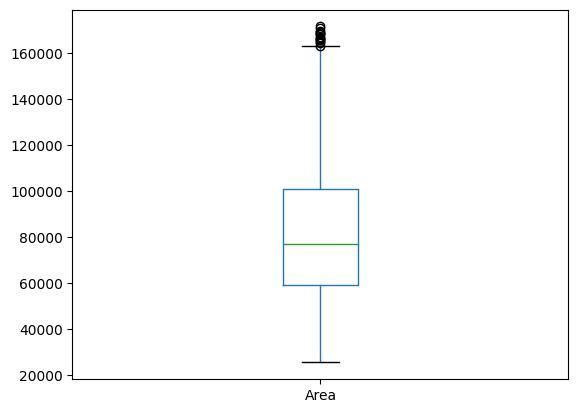

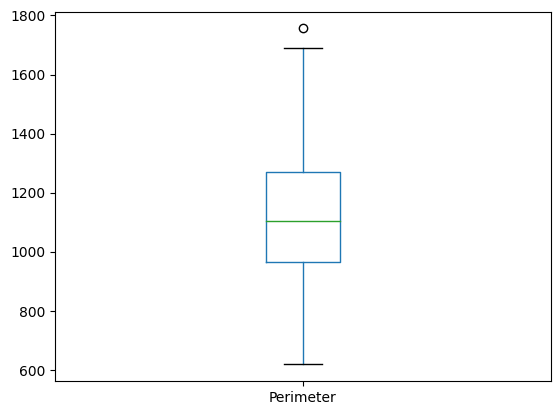

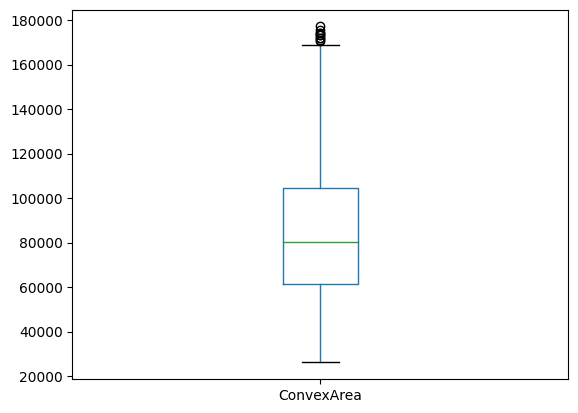

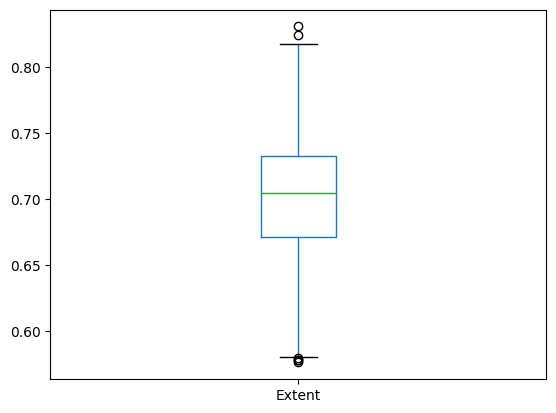

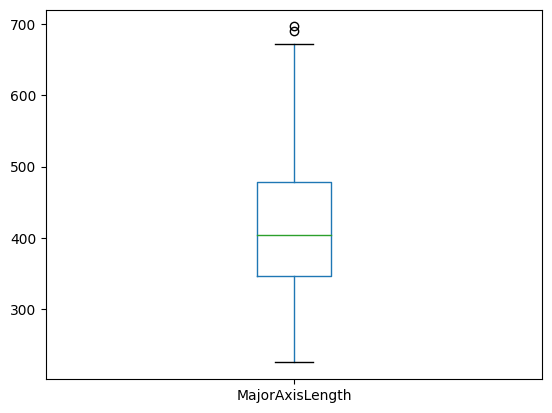

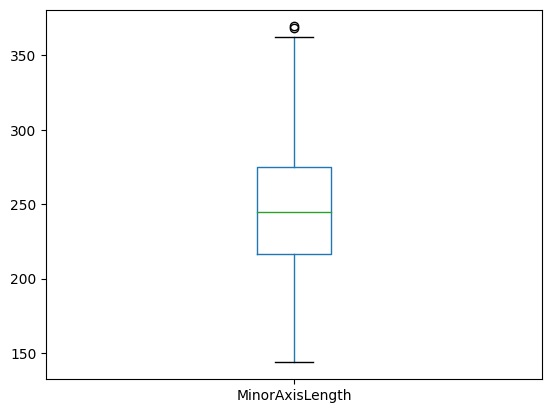

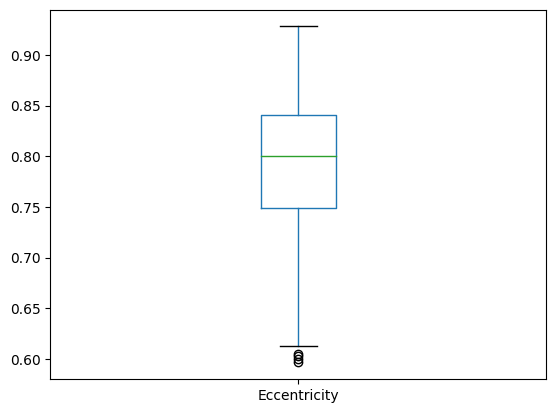

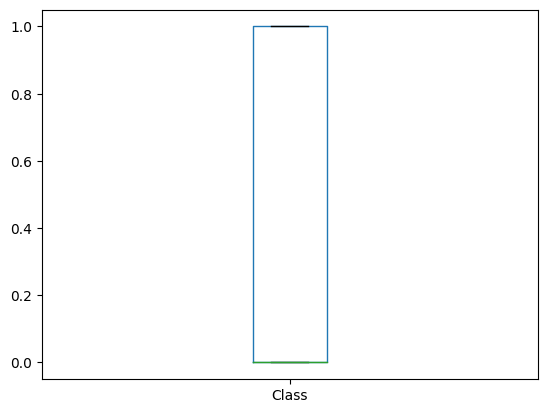

In [22]:
plot_box(df_clean,'Area')
plot_box(df_clean,'Perimeter')
plot_box(df_clean,'ConvexArea')
plot_box(df_clean,'Extent')
plot_box(df_clean,'MajorAxisLength') 
plot_box(df_clean,'MinorAxisLength') 
plot_box(df_clean,'Eccentricity')
plot_box(df_clean,'Class')

In [23]:
p=pd.read_csv("C:\project\Copy of Raisin_Dataset_clean.csv")

In [24]:
print(p)

      Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    49242       318.125407       200.122120      0.777351       51368   
..     ...              ...              ...           ...         ...   
790  83248       430.077308       247.838695      0.817263       85839   
791  87350       440.735698       259.293149      0.808629       90899   
792  99657       431.706981       298.837323      0.721684      106264   
793  93523       476.344094       254.176054      0.845739       97653   
794  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter  Class  
0    0.758651   1184.040      0  
1    0.684130   1121.786      0  
2    0.63

In [25]:
p.shape

(795, 8)

RELATIONSHIP ANALYSIS: CHECKING FOR MISSING VALUES

<Axes: >

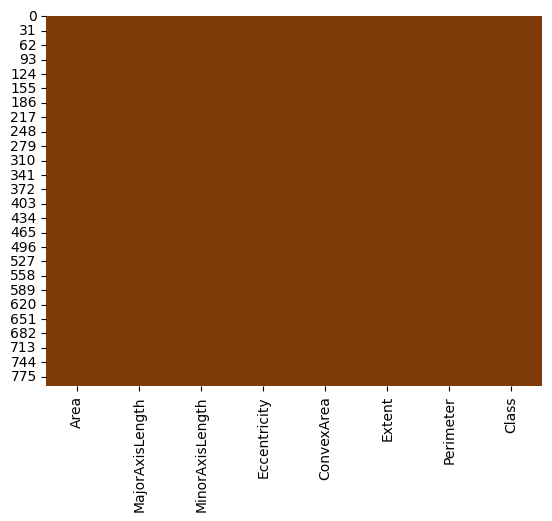

In [26]:
#VISUALIZED CHECKING FOR MISSING VALUES 
sns.heatmap(p.isnull(),cbar=False,cmap='PuOr')

WITH HEATMAP FUNCTION FROM SEABORN LIBRARY WE CAN SEE THE AMOUNT OF MISSING VALUE VISUALLY 
NOTE: IN OUR CASE WE DONT HAVE ANY MISSING VALUES

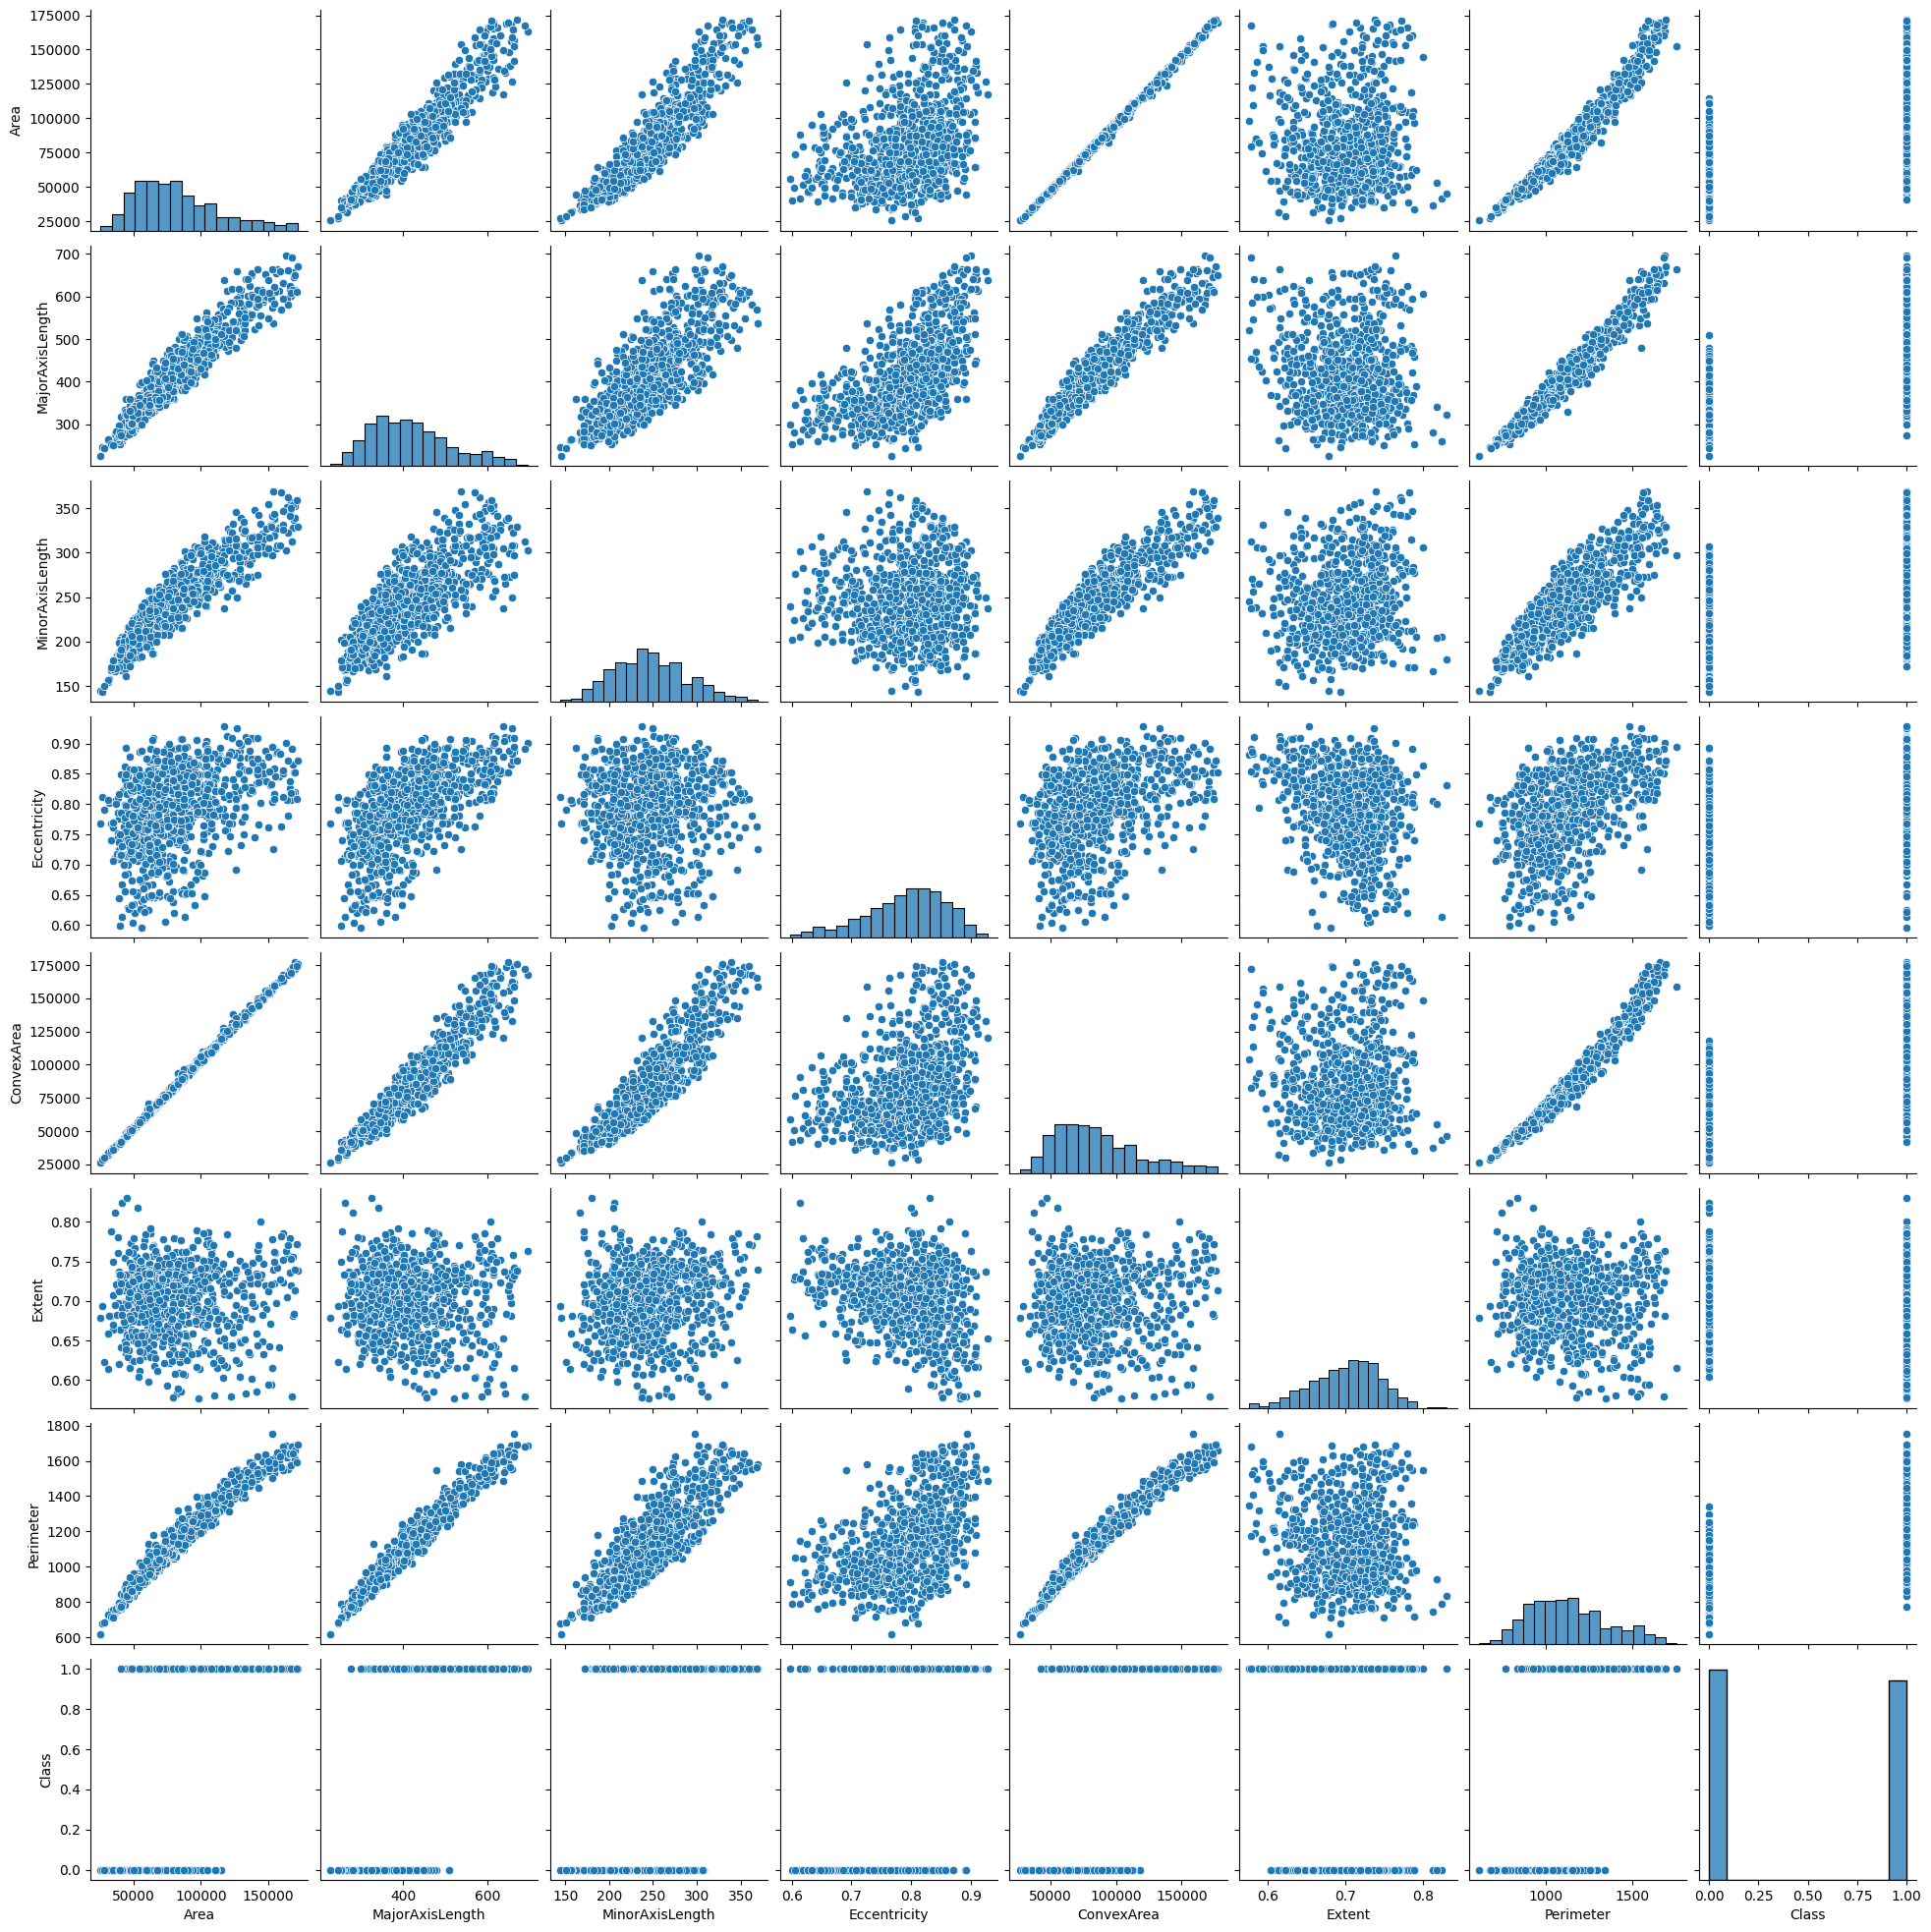

In [27]:
#PAIR PLOT(TO IDENTIFY RELATIONSHIP BETWEEN VARIABLES AND FIND OUTLIERS)
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
sns.pairplot(p)

CORELATION ANALYSIS

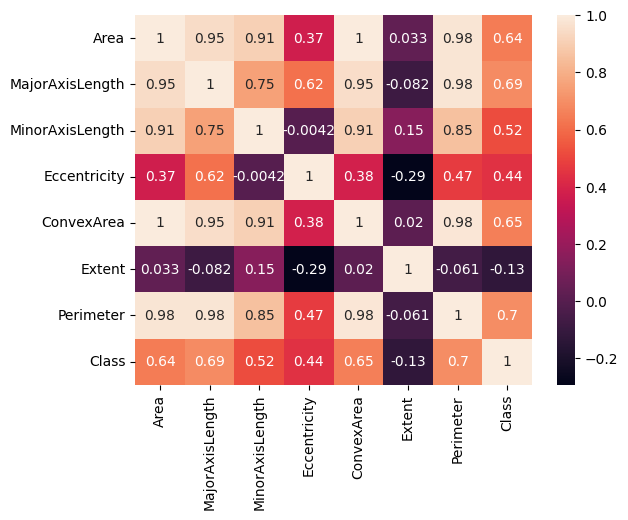

In [28]:
# CORRELATION MATRIX
# SAVE THE CLASS COLUMN FOR REST
# C_column = dp['Class']
# dp = dp.drop(['Class'], axis=1)

#SHOW RELATION BTW EACH PAIR OF VARIABLE IN DATAFRAME.DARKEST COLOUR REPRESENT A STRONGEST CORRELATION
corr_matrix = p.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

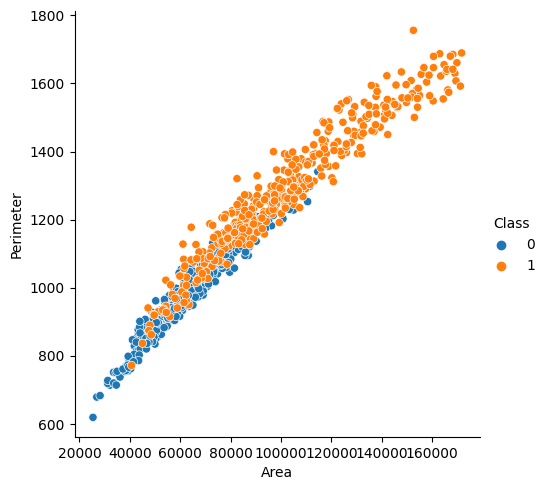

In [29]:
# dp = dp.join(C_column, how='outer')
#RELATIONAL PLOTS
sns.relplot(
    x='Area',
    y='Perimeter',
    hue='Class',
    kind='scatter',
    data=p
)

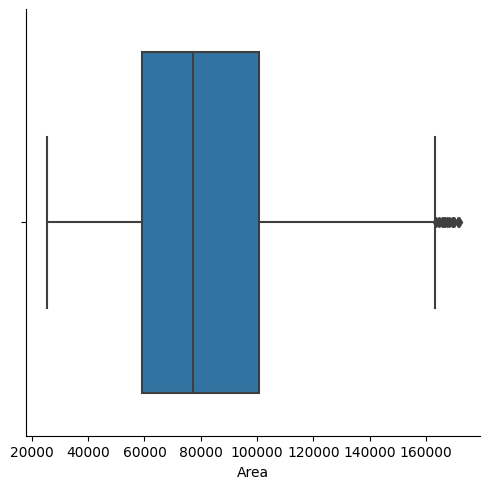

In [30]:
#CATEGORICAL PLOTS
sns.catplot(
    x='Area',
    kind='box',
    data=p
)

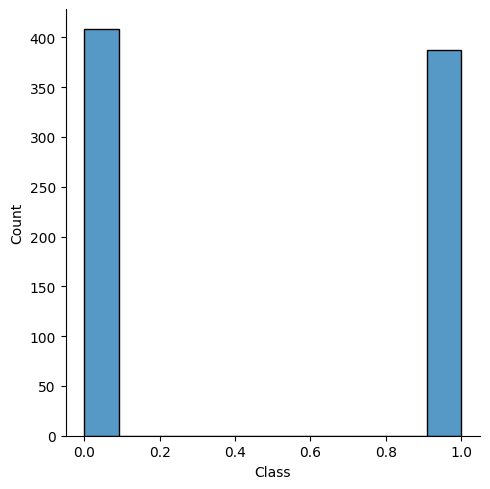

In [31]:
sns.displot(
    data=p,
    x='Class',
    kind='hist'
)

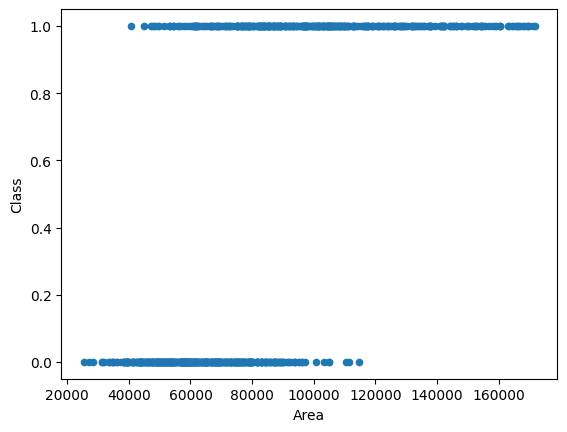

In [32]:
p.plot(
    x ='Area',
    y='Class', 
    kind='scatter'
)
plt.show()

FEATURE ENGINEERING

In [33]:
p.Class.unique()

array([0, 1], dtype=int64)

In [34]:
pd.get_dummies(p['Class']).head()

,0,1
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [35]:
Class=pd.get_dummies(p['Class'],drop_first=True)
Class.head() , Class.tail()
#1 represent Besni and 0 represent Kecimen

(       1
 0  False
 1  False
 2  False
 3  False
 4  False,
         1
 790  True
 791  True
 792  True
 793  True
 794  True)

In [36]:
#CONCATENATE THE ABOVE IN THE ORIGINAL DATAFRAME AND DROP THE REPEATED VALUES
ndp=pd.concat([p,Class],axis=1)
ndp.drop(['Class'],axis=1,inplace=True,)
ndp.head()
ndp.tail()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,1
790,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,True
791,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,True
792,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,True
793,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,True
794,85609,512.081774,215.271976,0.907345,89197,0.632020,1272.862,True


In [37]:
# #FEATURE VARIABLE OF X(INDEPENDENT VARIABLE)
# X = ndp.drop('1',axis=1)
# #FEATURE VARIABLE OF y(DEPENDENT VARIABLE)
# y = ndp['1']

feature_dp=ndp[['Area','MajorAxisLength','MinorAxisLength' ,'Eccentricity','ConvexArea','Extent','Perimeter']]
#INDEPENDENT VARIABLE
X=np.asarray(feature_dp)
#DEPENDENT VARIABLE
y=np.asarray(p['Class'])

RANDOM FOREST CLASSIFICATION ALGORITHM

SPLITTING THE DATAS (TEST AND TRAIN)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size=0.3, random_state=0)

In [40]:
print('X_Train',X_train.shape)
print('y_Train',y_train.shape)
print('X_Test',X_test.shape)
print('y_Test',y_test.shape)


X_Train (556, 7)
y_Train (556,)
X_Test (239, 7)
y_Test (239,)


ENTROPY CRITERIA

In [41]:
#TRAINING RANDOM FOREST
classifier = RandomForestClassifier(n_estimators=5, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

In [42]:
#PREDICT THE RESULT
y_out = classifier.predict(X_test)
y_out

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [43]:
#CONFUSION MATRIX
com = confusion_matrix(y_test , y_out)
print(com)

[[108  16]
 [ 22  93]]


In [44]:
accuracy_score(y_test , y_out)

0.8410041841004184

In [45]:
print(classification_report(y_test , y_out))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       124
           1       0.85      0.81      0.83       115

    accuracy                           0.84       239
   macro avg       0.84      0.84      0.84       239
weighted avg       0.84      0.84      0.84       239



GINI CRITERIA 

In [46]:
#TRAINING RANDOM FOREST
classifier = RandomForestClassifier(n_estimators=12, criterion='gini', random_state=1234)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=12, random_state=1234)

In [47]:
y_out = classifier.predict(X_test)
accuracy_score(y_test , y_out)

0.8493723849372385

SVM

In [48]:
from sklearn import svm
from sklearn.metrics import classification_report

In [49]:
feature_dp=ndp[['Area','MajorAxisLength','MinorAxisLength' ,'Eccentricity','ConvexArea','Extent','Perimeter']]
#INDEPENDENT VARIABLE
X=np.asarray(feature_dp)
#DEPENDENT VARIABLE
y=np.asarray(p['Class'])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size=0.2, random_state=8)

In [51]:
print('X_Train',X_train.shape)
print('y_Train',y_train.shape)
print('X_Test',X_test.shape)
print('y_Test',y_test.shape)

X_Train (636, 7)
y_Train (636,)
X_Test (159, 7)
y_Test (159,)


In [52]:
classify=svm.SVC(kernel='linear',gamma='auto',C=2)
classify.fit(X_train,y_train)
y_outs=classify.predict(X_test)

In [53]:
print(classification_report(y_test,y_outs))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87        76
           1       0.94      0.80      0.86        83

    accuracy                           0.87       159
   macro avg       0.88      0.87      0.87       159
weighted avg       0.88      0.87      0.87       159

